<a href="https://colab.research.google.com/github/jahnavi8009/Face_Emotion_Recognition/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import google.colab
google.colab.drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install livelossplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from livelossplot import PlotLossesKerasTF
import tensorflow as tf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
img = tf.keras.preprocessing.image.load_img(os.path.join('/content/gdrive/MyDrive/Train','angry','Training_10118481.jpg'), color_mode = 'grayscale') # add the filename to the path. An example file was chosen from the angry folder

In [ ]:
import os
import numpy as np
import tensorflow as tf

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = os.path.basename(folder)
        img = tf.keras.preprocessing.image.load_img(os.path.join(folder, filename), color_mode = 'grayscale')
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = tf.keras.preprocessing.image.smart_resize(img,(48,48))
        images.append(img)
        labels.append(label)
    return images, labels

image_data = []
image_labels = []

for emotion in ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']:
    folder_path = os.path.join('/content/gdrive/MyDrive/Train', emotion)
    images, labels = load_images_from_folder(folder_path)
    image_data.extend(images)
    image_labels.extend(labels)

image_data = np.array(image_data)
image_labels = np.array(image_labels)

image_data = image_data / 255.0

print(image_data.shape)
print(image_labels.shape)

(28382, 48, 48, 1)
(28382,)


In [ ]:
import os
import numpy as np
import tensorflow as tf

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = os.path.basename(folder)
        img = tf.keras.preprocessing.image.load_img(os.path.join(folder, filename), color_mode='grayscale')
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = tf.keras.preprocessing.image.smart_resize(img, (48, 48))
        images.append(img)
        labels.append(label)
    return images, labels

test_image_data = []
test_image_labels = []

for emotion in ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']:
    folder_path = os.path.join('/content/gdrive/MyDrive/Test', emotion)
    images, labels = load_images_from_folder(folder_path)
    test_image_data.extend(images)
    test_image_labels.extend(labels)

test_image_data = np.array(test_image_data)
test_image_labels = np.array(test_image_labels)

test_image_data = test_image_data / 255.0  # Normalize pixel values

print(test_image_data.shape)
print(test_image_labels.shape)

(7218, 48, 48, 1)
(7218,)


In [ ]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("/content/gdrive/MyDrive/Train",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("/content/gdrive/MyDrive/Test",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28382 images belonging to 7 classes.
Found 7218 images belonging to 7 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor='val_accuracy', # Changed filename to end with .weights.h5
                             save_weights_only=True, mode='max', verbose=1)

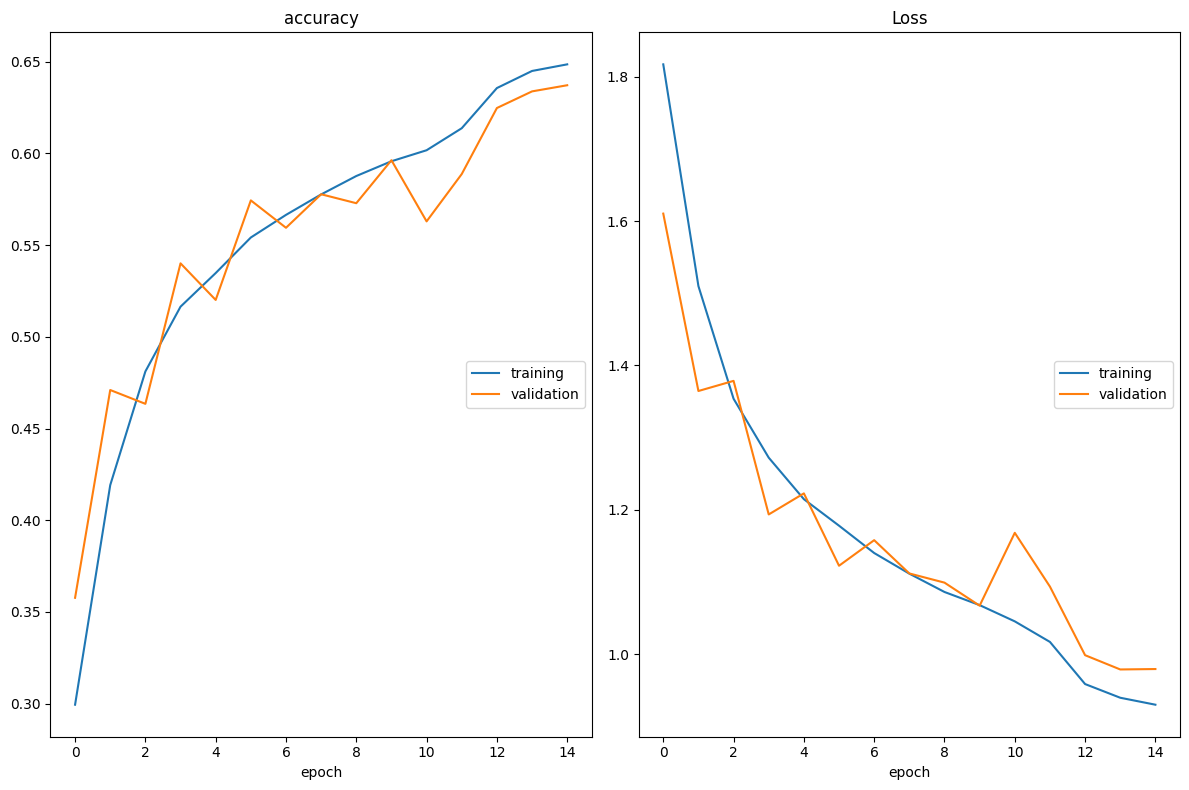

accuracy
	training         	 (min:    0.299, max:    0.649, cur:    0.649)
	validation       	 (min:    0.358, max:    0.637, cur:    0.637)
Loss
	training         	 (min:    0.930, max:    1.817, cur:    0.930)
	validation       	 (min:    0.979, max:    1.610, cur:    0.979)

Epoch 15: saving model to model_weights.weights.h5
443/443 [==============================] - 262s 590ms/step - loss: 0.9300 - accuracy: 0.6485 - val_loss: 0.9795 - val_accuracy: 0.6371 - lr: 5.0000e-05
CPU times: user 8h 32min 58s, sys: 5h 48min 38s, total: 14h 21min 36s
Wall time: 37min 59s


In [ ]:
%%time

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)